CMPE258 Deep Learning

Assignment 3 Part A - FastAI :
Perform the following tasks: Use FastAI to write a detailed Colab notebook that shows training and inference for the following tasks using FastAI. Showcase results and metrics:



1.   Object detection task
2.   Vision segmentation task
3.   Tabular taskVision
4.   Recommendation task





##1. Object detection task

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.7 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision import *
from fastai.collab import *
from io import BytesIO
import pandas as pd
import requests
import os

In [ ]:
from fastai.vision.all import *

In [ ]:
path = Path("/content/drive/MyDrive/CMPE258/Assignment4_Dataset/TEST")


In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = datablock.dataloaders(path)


In [ ]:
from fastai.vision.all import *

# Ensure Google Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the dataset
path = Path("/content/drive/MyDrive/CMPE258/Assignment4_Dataset/TEST")

# Create the DataLoaders
dls = ImageDataLoaders.from_path_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=parent_label,
    item_tfms=Resize(224)
)

# Create the Learner
learn = vision_learner(dls, resnet34, metrics=error_rate)

# Fine-tune the model
learn.fine_tune(1)

# Save the model if you wish to reuse it later
learn.export('yoga_poses_classifier.pkl')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 158MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.114698,1.315367,0.489362,02:22


epoch,train_loss,valid_loss,error_rate,time
0,0.821243,0.432871,0.170213,00:17


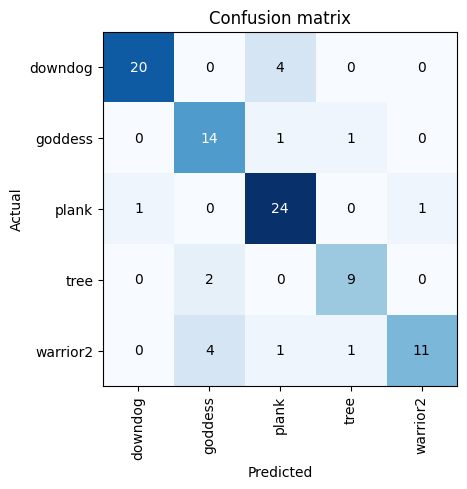

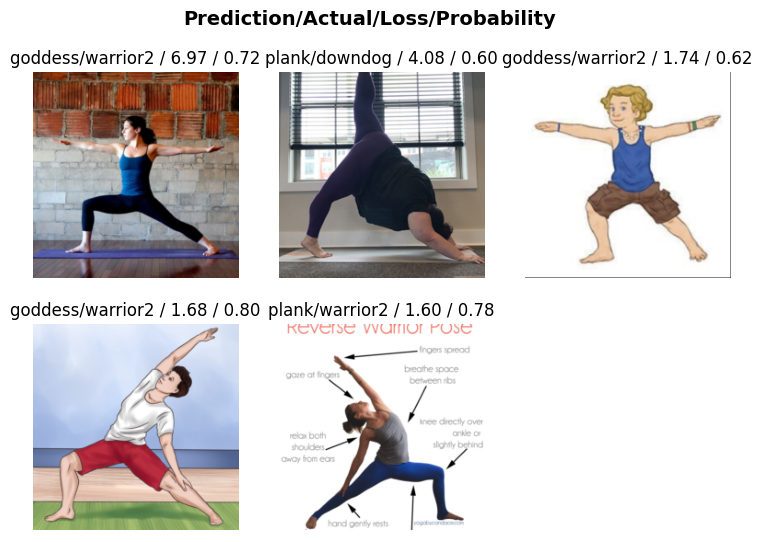

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5)


In [ ]:
# Replace 'path_to_new_image.jpg' with the actual path to the image you want to predict
pred, pred_idx, probs = learn.predict('/content/drive/MyDrive/CMPE258/Assignment4_Dataset/00000146.png')
print(f"Predicted class: {pred}; Probability: {probs[pred_idx]:.04f}")


Predicted class: plank; Probability: 0.9989


##2. Vision segmentation task

In [ ]:
from fastai.vision.all import *
from fastai.data.external import untar_data, URLs


## Tabular - Titanic

In [ ]:
from fastai.tabular.all import *


In [ ]:
# If the file is stored in your Google Drive, mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your dataset file
path = '/content/drive/MyDrive/CMPE258/Assignment4_Dataset/Titanic dataset/titanic_train.csv'

# Load the data into a DataFrame
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the dependent variable and the categorical and continuous features
dep_var = 'Survived'
cat_names = ['Pclass', 'Sex', 'Embarked']
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']
procs = [Categorify, FillMissing, Normalize]

# Set up the TabularDataLoaders
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=dep_var, splits=splits)

dls = to.dataloaders(bs=64)


SuggestedLRs(valley=0.0008317637839354575)

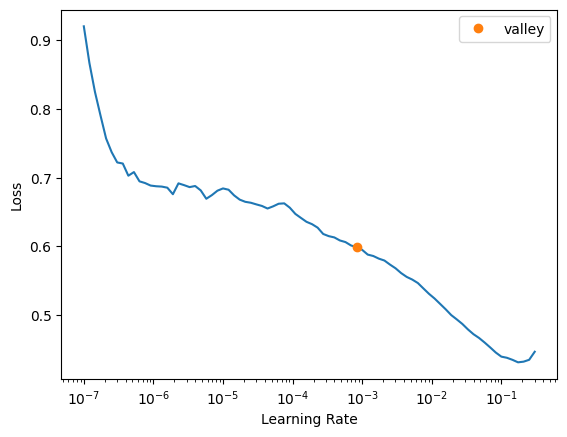

In [ ]:
# Define the model
learn = tabular_learner(dls, metrics=accuracy)

# Find the best learning rate
learn.lr_find()


In [ ]:
# Fit the model based on the selected learning rate
learn.fit_one_cycle(5, lr_max=0.0008317637839354575)  # Replace 1e-2 with the learning rate you choose


epoch,train_loss,valid_loss,accuracy,time
0,0.136614,0.139726,0.595506,00:00
1,0.133083,0.131184,0.595506,00:00
2,0.133126,0.131853,0.595506,00:00
3,0.133098,0.132853,0.595506,00:00
4,0.131901,0.132439,0.595506,00:00


In [ ]:
# Display the model's performance
learn.show_results()


,Pclass,Sex,Embarked,Age_na,Age,SibSp,Parch,Fare,Survived,Survived_pred
0,2.0,2.0,1.0,1.0,-0.332564,0.461591,2.034995,0.182443,0.0,0.247089
1,3.0,2.0,2.0,2.0,-0.101374,-0.462887,-0.464491,-0.477002,0.0,0.169039
2,1.0,1.0,3.0,1.0,-0.563754,0.461591,-0.464491,0.670183,1.0,0.981372
3,3.0,1.0,3.0,2.0,-0.101374,2.310547,0.785252,-0.131644,0.0,0.387352
4,3.0,2.0,3.0,2.0,-0.101374,-0.462887,-0.464491,-0.471154,0.0,0.152986
5,1.0,2.0,1.0,1.0,2.364657,0.461591,0.785252,0.915799,1.0,0.224449
6,1.0,2.0,3.0,1.0,2.672911,0.461591,4.534481,4.498681,0.0,0.010903
7,3.0,1.0,3.0,1.0,-0.332564,-0.462887,-0.464491,-0.476515,0.0,0.594089
8,2.0,2.0,3.0,1.0,1.285769,-0.462887,-0.464491,-0.121248,0.0,0.203748


In [ ]:
# Assume 'df' is your DataFrame and 'dep_var' is your dependent variable (e.g., 'Survived')
cat_names = ['Pclass', 'Sex', 'Embarked']  # categorical variables
cont_names = ['Age', 'SibSp', 'Parch', 'Fare']  # continuous variables
procs = [Categorify, FillMissing, Normalize]

splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=dep_var, splits=splits, y_block=CategoryBlock())

dls = to.dataloaders(bs=64)


In [ ]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(5, 1e-2)  # Fit the model


epoch,train_loss,valid_loss,accuracy,time
0,0.672889,0.626276,0.735955,00:00
1,0.600319,0.521602,0.780899,00:00
2,0.549119,0.436528,0.842697,00:00
3,0.507774,0.385098,0.876405,00:00
4,0.480677,0.375694,0.865169,00:00


In [ ]:
# Interpret the learner
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
# Check if the vocab attribute exists
print(dls.vocab)


[0, 1]


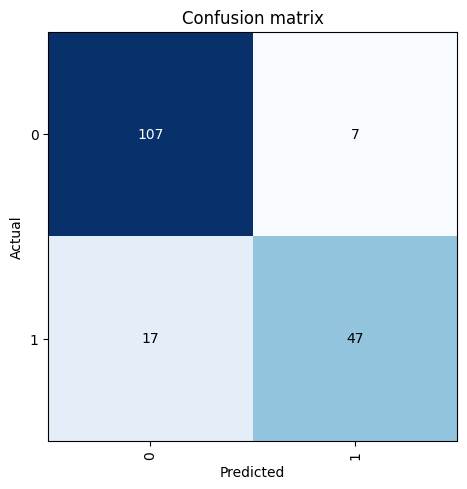

In [ ]:
# Plot the confusion matrix
interp.plot_confusion_matrix()

# Plot the top losses
interp.plot_top_losses(5)


In [ ]:
test_path = '/content/drive/MyDrive/CMPE258/Assignment4_Dataset/Titanic dataset/titanic_test.csv'
test_df = pd.read_csv(test_path)


In [ ]:
# Fill missing values in 'Fare' with the median or mean of the column from the training set
fare_median = to.train.conts['Fare'].median()  # You can use the training dataset's median
test_df['Fare'].fillna(fare_median, inplace=True)

# Verify there are no more NaN values in 'Fare'
assert test_df['Fare'].isna().sum() == 0, "There are still NaN values in 'Fare'"


In [ ]:
# Create a TabularPandas object for the test set using the same processes as the training set
test_to = to.new(test_df)
test_to.process()


In [ ]:
# Create a test DataLoader
dl = learn.dls.test_dl(test_df, bs=64)

# Make predictions
test_preds, _ = learn.get_preds(dl=dl)


In [ ]:
# Convert probabilities to class indices
test_preds_argmax = test_preds.argmax(dim=1)

# Optionally: Convert indices to class labels using the vocab
test_preds_labels = [dls.vocab[i] for i in test_preds_argmax]


In [ ]:
# Convert predictions to a DataFrame
test_preds_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # Assuming PassengerId is the identifier in your test set
    'PredictedSurvival': test_preds_argmax.numpy(),  # If you want the class indices
    'PredictedSurvivalLabel': test_preds_labels  # If you want the string labels
})

# Show the first few predictions
test_preds_df.head()


,PassengerId,PredictedSurvival,PredictedSurvivalLabel
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,0,0


In [ ]:
# Distribution of predicted survival
test_preds_df['PredictedSurvivalLabel'].value_counts()


0    264
1    154
Name: PredictedSurvivalLabel, dtype: int64

## recommendation task


In [ ]:
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd

# Load and preprocess data
path = untar_data(URLs.ML_100k)
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=['user', 'movie', 'rating', 'timestamp'])

# Create a subset of 10% data
subset_ratings = ratings.sample(frac=0.1, random_state=42)

dls = CollabDataLoaders.from_df(subset_ratings, item_name='movie', bs=64)

# Define and train model
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

# Evaluate model
learn.model

epoch,train_loss,valid_loss,time
0,1.765634,1.641027,00:02
1,1.227407,1.219621,00:00
2,0.629435,1.150540,00:00
3,0.316526,1.153663,00:01
4,0.220911,1.154763,00:01


EmbeddingDotBias(
  (u_weight): Embedding(887, 50)
  (i_weight): Embedding(1183, 50)
  (u_bias): Embedding(887, 1)
  (i_bias): Embedding(1183, 1)
)

In [ ]:
# Import necessary libraries
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd
from torch.nn.functional import mse_loss

# Load and preprocess data
path = untar_data(URLs.ML_100k)
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=['user', 'movie', 'rating', 'timestamp'])

# Create a subset of 10% data
subset_ratings = ratings.sample(frac=0.1, random_state=42)

dls = CollabDataLoaders.from_df(subset_ratings, item_name='movie', bs=64)

# Define and train model
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))
learn.fit_one_cycle(5, 5e-3, wd=0.1)

# 1. Model Evaluation
test_dls = learn.dls.test_dl(subset_ratings)
preds, targets = learn.get_preds(dl=test_dls)
rmse = mse_loss(preds, targets).sqrt().item()
print(f"RMSE: {rmse:.2f}")


epoch,train_loss,valid_loss,time
0,1.731679,1.688920,00:01
1,1.221761,1.243992,00:01
2,0.629027,1.170487,00:01
3,0.331716,1.172638,00:00
4,0.231180,1.173815,00:00


<ipython-input-4-fb627de11b0d>:23: UserWarning: Using a target size (torch.Size([10000, 1])) that is different to the input size (torch.Size([10000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  rmse = mse_loss(preds, targets).sqrt().item()


RMSE: 1.37
